In [ ]:
import numpy as np
import scipy.signal as scs
import matplotlib.pyplot as plt

def initilise(sizex,sizey):
    """
    Initialise the array cells to either alive or dead
    """
    cells = np.random.randint(0,2,(sizey,sizex))
    return cells

def step(cells):
    """
    Take the input cells and evolve one time step
    """
    
    #the first two lines just count the neighbours using convolution
    mask = np.array([[1,1,1],[1,0,1],[1,1,1]])
    count = scs.convolve2d(cells,mask,mode='same',boundary='wrap')
    
    # Now we apply some logic based on the number of neighbours for each cell
    newcells = np.where(cells==1,np.where((count>1),np.where(count<4,1,0),0),np.where(count==3,1,0))
    
    return newcells

def run_game(cells=None,sizex=10,sizey=5,steps=40):
    """
    Evolve the input cells 'steps' timesteps
    """
    
    # if no input is set create a random one
    if cells is None:
        cells = initilise(sizex,sizey)
        
    # plot time step     
    fig = plt.figure()
    ax = plt.axes()
    ax.matshow(cells)
    plt.show()
    
    for i in range(steps): 
        # evolve the array
        cells = step(cells) 
        
        # plot time step 
        fig = plt.figure()
        ax = plt.axes()
        ax.matshow(cells)
        plt.show()

In [ ]:
cells = np.array([[0,0,0,0,0],
                  [0,0,0,1,0],
                  [0,1,0,1,0],
                  [0,0,1,1,0],
                  [0,0,0,0,0]])

run_game(cells=cells,steps=20)

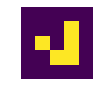

In [4]:
#Here is a version that makes a movie of the output

import numpy as np
import scipy.signal as scs
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def initilise(sizex,sizey):
    """
    Initialise the array cells to either alive or dead
    """
    cells = np.random.randint(0,2,(sizey,sizex))
    return cells

def step(cells):
    """
    Take the input cells and evolve one time step
    """
    
    #the first two lines just count the neighbours using convolution
    mask = np.array([[1,1,1],[1,0,1],[1,1,1]])
    count = scs.convolve2d(cells,mask,mode='same',boundary='wrap')
    
    # Now we apply some logic based on the number of neighbours for each cell
    newcells = np.where(cells==1,np.where((count>1),np.where(count<4,1,0),0),np.where(count==3,1,0))
    
    return newcells

# this now makes a list of arrays to animate
def run_game(output,cells=None,sizex=10,sizey=5,steps=40):
    """
    Evolve the input cells 'steps' timesteps and return a list of states
    """
    
    # if no input is set create a random one
    if cells is None:
        cells = initilise(sizex,sizey)
        
    # evolve the array and append to output
    output.append(cells)
    for i in range(steps): 
        cells = step(cells)
        output.append(cells)
        
    return output

def animate(frame):
    """
    Animation function. Takes the current frame number (to select the potion of
    data to plot) and a line object to update.
    """
    # We have to use global variables here as animate can only take 'frame' which
    # is the frame number and not any other arguments
    global image, data
    
    # turn array into image
    image.set_array(data[frame])

    return image

# Initialise
cells = np.array([[0,0,0,0,0],
                  [0,0,0,1,0],
                  [0,1,0,1,0],
                  [0,0,1,1,0],
                  [0,0,0,0,0]])
data = []
frames = 100

# create list of arrays
run_game(data, cells=cells,steps=frames)


# Create plot
fig, ax = plt.subplots(1, figsize=(1, 1))
fig.subplots_adjust(0, 0, 1, 1)
ax.axis("off")

# Create image object
image = ax.imshow(data[0], vmin=0, vmax=1)

# Turn list of arrays into animation
animation = FuncAnimation(fig,animate,np.arange(frames),fargs=[],interval=100)

animation.save("output.mp4", dpi=512)

In [ ]:
# Here is a version that makes a movie of the output
# FuncAnimation is the best tool to replace just plotting
# multiple images and then joining them but is a bit of a pain to use

import numpy as np
import scipy.signal as scs
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def initilise(sizex,sizey):
    """
    Initialise the array cells to either alive or dead
    """
    cells = np.random.randint(0,2,(sizey,sizex))
    return cells

def step(cells):
    """
    Take the input cells and evolve one time step
    """
    
    #the first two lines just count the neighbours using convolution
    mask = np.array([[1,1,1],[1,0,1],[1,1,1]])
    count = scs.convolve2d(cells,mask,mode='same',boundary='wrap')
    
    # Now we apply some logic based on the number of neighbours for each cell
    newcells = np.where(cells==1,np.where((count>1),np.where(count<4,1,0),0),np.where(count==3,1,0))
    
    return newcells

# this now makes a list of arrays to animate
def run_game(output,cells=None,sizex=10,sizey=5,steps=40):
    """
    Evolve the input cells 'steps' timesteps and return a list of states
    """
    
    # if no input is set create a random one
    if cells is None:
        cells = initilise(sizex,sizey)
        
    # evolve the array and append to output
    output.append(cells)
    for i in range(steps): 
        cells = step(cells)
        output.append(cells)
        
    return output

def animate(frame):
    """
    Animation function. Takes the current frame number (to select the potion of
    data to plot) and a line object to update.
    """
    # We have to use global variables here as animate can only take 'frame' which
    # is the frame number and not any other arguments This isn't strictly nessecary
    global image, data
    
    # turn array into image
    image.set_array(data[frame])

    return image

# Initialise
cells = np.array([[0,0,0,0,0],
                  [0,0,0,1,0],
                  [0,1,0,1,0],
                  [0,0,1,1,0],
                  [0,0,0,0,0]])
data = []
frames = 100

# create list of arrays
run_game(data, cells=cells,steps=frames)


# Create plot
fig, ax = plt.subplots(1, figsize=(1, 1))
fig.subplots_adjust(0, 0, 1, 1)
ax.axis("off")

# Create image object
image = ax.imshow(data[0], vmin=0, vmax=1)

# Turn list of arrays into animation
animation = FuncAnimation(fig,animate,np.arange(frames),fargs=[],interval=100)

animation.save("output.mp4", dpi=512)